In [1]:
import sympy as sm
sm.init_printing()
%matplotlib notebook

In [2]:
x = sm.symbols('x', real=True)

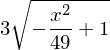

In [3]:
w = 3 * sm.sqrt(1 - (x / 7)**2)
w

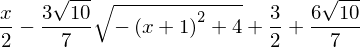

In [4]:
l = (x + 3) / 2 - sm.S(3) / 7 * sm.sqrt(10) * sm.sqrt(4 - (x + 1)**2) + sm.S(6) / 7 * sm.sqrt(10)
l

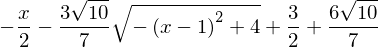

In [5]:
r = sm.S(1) / 2 * (3 - x) - sm.S(3) / 7 * sm.sqrt(10) * sm.sqrt(4 - (x - 1)**2) + sm.S(6) / 7 * sm.sqrt(10)
r

In [6]:
h_ = sm.symbols('h_')

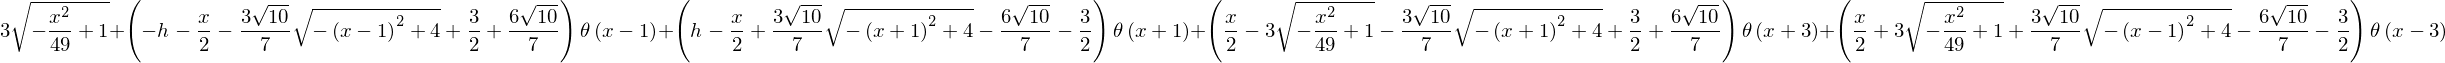

In [7]:
f = ((h_ - l) * sm.Heaviside(x + 1) + (r - h_) * sm.Heaviside(x - 1) + (l - w) * 
      sm.Heaviside(x + 3) + (w - r) * sm.Heaviside(x - 3) + w)
f

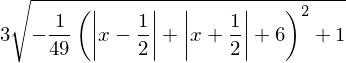

In [8]:
f_of = f.xreplace({x: sm.Abs(x + sm.S(1) / 2) + sm.Abs(x - sm.S(1) / 2) + 6})
f_of

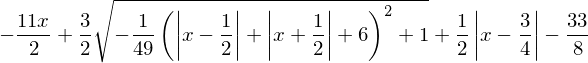

In [9]:
h = sm.S(1) / 2 * (f_of - 11 * (x + sm.S(3) / 4) + sm.Abs(x - sm.S(3) / 4))
h

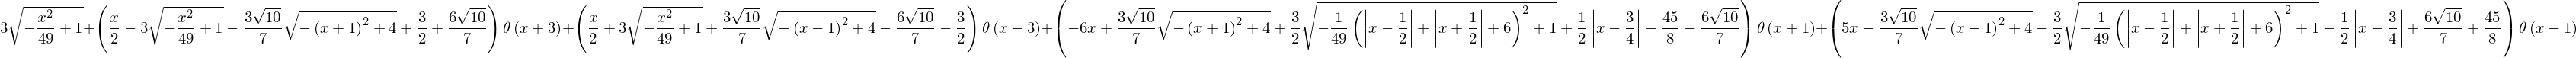

In [10]:
f = f.xreplace({h_: h})
f

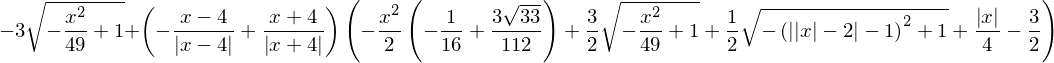

In [11]:
g = sm.S(1) / 2 * (sm.Abs(x / 2) + sm.sqrt(1 - (sm.Abs(sm.Abs(x) - 2) - 1)**2) - sm.S(1) / 112 * (3 * sm.sqrt(33) - 7) * x**2 + 3 * sm.sqrt(1 - (sm.S(1) / 7 * x)**2) - 3) * ((x + 4) / sm.Abs(x + 4) - (x - 4) / sm.Abs(x - 4)) - 3 * sm.sqrt(1 - (x / 7)**2)
g

<IPython.core.display.Javascript object>


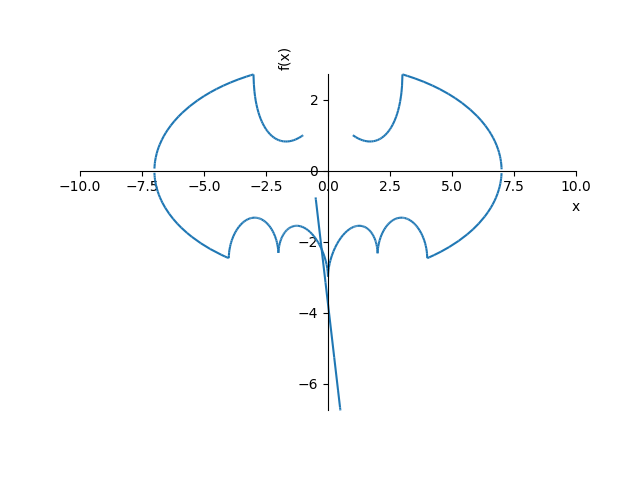

In [12]:
# TODO : There is an error somewhere here in the f function that plots the bat's ears.
sm.plot(f, g);

In [13]:
from sympy.printing.jscode import JavascriptCodePrinter

In [14]:
class JSPrinter(JavascriptCodePrinter):
    def _print_Heaviside(self, expr):
        # NOTE : expr.rewrite(sm.Piecewise) almost does the right thing.
        P = sm.Piecewise((0, expr.args[0] < 0), (1, expr.args[0] > 0), (sm.S(1) / 2, True))
        return self._print(P)

In [15]:
jsprinter = JSPrinter()

In [16]:
from textwrap import wrap

In [17]:
print('\n'.join(wrap(jsprinter.doprint(f).replace('\n', ' '))))

3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + ((1/2)*x -
3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) -
3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x + 1, 2) + 4) + 3/2 +
(6/7)*Math.sqrt(10))*((x + 3 < 0) ? (    0 ) : ((x + 3 > 0) ? (    1 )
: (    1/2 ))) + ((1/2)*x + 3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1, 2) + 4) -
6/7*Math.sqrt(10) - 3/2)*((x - 3 < 0) ? (    0 ) : ((x - 3 > 0) ? (
1 ) : (    1/2 ))) + (-6*x + (3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x
+ 1, 2) + 4) + (3/2)*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) +
Math.abs(x + 1/2) + 6, 2) + 1) + (1/2)*Math.abs(x - 3/4) - 45/8 -
6/7*Math.sqrt(10))*((x + 1 < 0) ? (    0 ) : ((x + 1 > 0) ? (    1 ) :
(    1/2 ))) + (5*x - 3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1, 2)
+ 4) - 3/2*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) + Math.abs(x +
1/2) + 6, 2) + 1) - 1/2*Math.abs(x - 3/4) + (6/7)*Math.sqrt(10) +
45/8)*((x - 1 < 0) ? (    0 ) : ((x - 1 > 0) ? (    1 ) : (    1/2 )))


In [18]:
print('\n'.join(wrap(jsprinter.doprint(g))))

-3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + (-(x - 4)/Math.abs(x - 4) +
(x + 4)/Math.abs(x + 4))*(-1/2*Math.pow(x, 2)*(-1/16 +
(3/112)*Math.sqrt(33)) + (3/2)*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(1/2)*Math.sqrt(-Math.pow(Math.abs(Math.abs(x) - 2) - 1, 2) + 1) +
(1/4)*Math.abs(x) - 3/2)


In [19]:
%%javascript
require.config({
  paths: {
      'chartjs': '//cdnjs.cloudflare.com/ajax/libs/Chart.js/2.6.0/Chart'
  }
});

<IPython.core.display.Javascript object>

In [20]:
from IPython.display import Javascript

In [21]:
js_template = """\

require(['chartjs'], function(chartjs){{

function g(x) {{
    return {bottom_function}
}};
    
function f(x) {{
    return {top_function}
}};

var ctx = document.getElementById("myChart");
var data = {{
    labels: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    datasets: [{{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        cubicInterpolationMode: 'monotone'
    }},
    {{
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        cubicInterpolationMode: 'monotone'

    }}]
}};

chartjs.Chart.pluginService.register({{
    beforeInit: function(chart) {{
        var data = chart.config.data;
        for (var i = 0; i < data.datasets.length; i++) {{
            for (var j = 0; j < data.labels.length; j++) {{
                var fct = data.datasets[i].function,
                    x = data.labels[j],
                    y = fct(x);
                data.datasets[i].data.push(y);
            }}
        }}
    }}
}});

var myBarChart = new chartjs.Chart(ctx, {{
    type: 'line',
    data: data,
    options: {{
        scales: {{
            yAxes: [{{
                ticks: {{
                    beginAtZero:true
                }}
            }}]
        }}
    }}
}});
    
}});

element.append("<canvas id='myChart'></canvas>");\
"""

In [22]:
Javascript(js_template.format(top_function='\n'.join(wrap(jsprinter.doprint(f).replace('\n', ' '))),
                   bottom_function='\n'.join(wrap(jsprinter.doprint(g)))))

<IPython.core.display.Javascript object>

In [23]:
%%javascript

require(['chartjs'], function(chartjs){

function g(x) {
    return -3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + (-(x - 4)/Math.abs(x - 4) +
(x + 4)/Math.abs(x + 4))*(-1/2*Math.pow(x, 2)*(-1/16 +
(3/112)*Math.sqrt(33)) + (3/2)*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(1/2)*Math.sqrt(-Math.pow(Math.abs(Math.abs(x) - 2) - 1, 2) + 1) +
(1/4)*Math.abs(x) - 3/2)
};
    
function f(x) {
    return 3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + ((1/2)*x -
3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) -
3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x + 1, 2) + 4) + 3/2 +
(6/7)*Math.sqrt(10))*((x + 3 < 0) ? (    0 ) : ((x + 3 > 0) ? (    1 )
: (    1/2 ))) + ((1/2)*x + 3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1, 2) + 4) -
6/7*Math.sqrt(10) - 3/2)*((x - 3 < 0) ? (    0 ) : ((x - 3 > 0) ? (
1 ) : (    1/2 ))) + (-6*x + (3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x
+ 1, 2) + 4) + (3/2)*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) +
Math.abs(x + 1/2) + 6, 2) + 1) + (1/2)*Math.abs(x - 3/4) - 45/8 -
6/7*Math.sqrt(10))*((x + 1 < 0) ? (    0 ) : ((x + 1 > 0) ? (    1 ) :
(    1/2 ))) + (5*x - 3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1, 2)
+ 4) - 3/2*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) + Math.abs(x +
1/2) + 6, 2) + 1) - 1/2*Math.abs(x - 3/4) + (6/7)*Math.sqrt(10) +
45/8)*((x - 1 < 0) ? (    0 ) : ((x - 1 > 0) ? (    1 ) : (    1/2 )))
};

var ctx = document.getElementById("myChart");
var data = {
    labels: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    datasets: [{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        cubicInterpolationMode: 'monotone'
    },
              {
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        cubicInterpolationMode: 'monotone'

    }]
};

chartjs.Chart.pluginService.register({
    beforeInit: function(chart) {
        var data = chart.config.data;
        for (var i = 0; i < data.datasets.length; i++) {
            for (var j = 0; j < data.labels.length; j++) {
            	var fct = data.datasets[i].function,
                	x = data.labels[j],
                	y = fct(x);
                data.datasets[i].data.push(y);
            }
        }
    }
});

var myBarChart = new chartjs.Chart(ctx, {
    type: 'line',
    data: data,
    options: {
        scales: {
            yAxes: [{
                ticks: {
                    beginAtZero:true
                }
            }]
        }
    }
});
    
});

element.append("<canvas id='myChart' width='200' height='200'></canvas>");

<IPython.core.display.Javascript object>